In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

x_train_10 = x_train[:10].reshape(10, 28, 28, 1)
y_train_10 = y_train[:10]
x_test_10 = x_test[:10].reshape(10, 28, 28, 1)
y_test_10 = y_test[:10]

print("Training data shape (first 10):", x_train_10.shape)
print("Training labels shape (first 10):", y_train_10.shape)
print("Testing data shape (first 10):", x_test_10.shape)
print("Testing labels shape (first 10):", y_test_10.shape)

print("Training data shape:", x_train.shape)
print("Testing data shape:", x_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape (first 10): (10, 28, 28, 1)
Training labels shape (first 10): (10,)
Testing data shape (first 10): (10, 28, 28, 1)
Testing labels shape (first 10): (10,)
Training data shape: (60000, 28, 28)
Testing data shape: (10000, 28, 28)


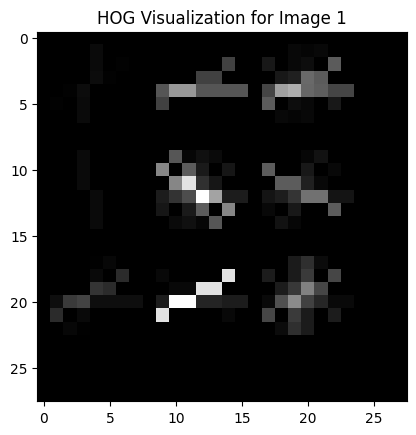

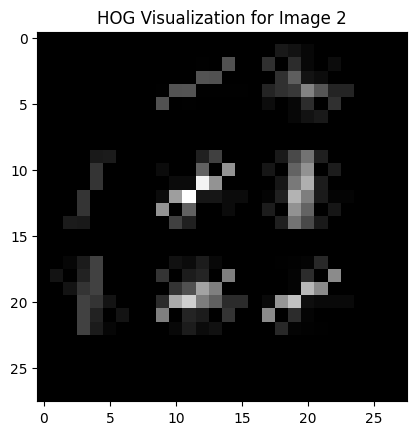

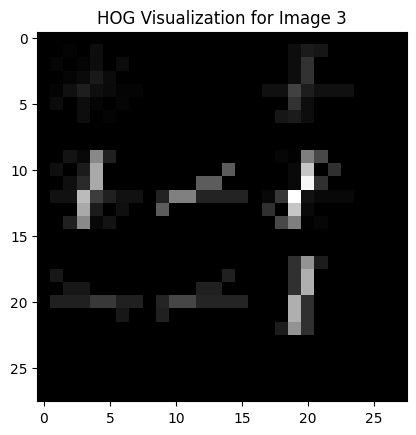

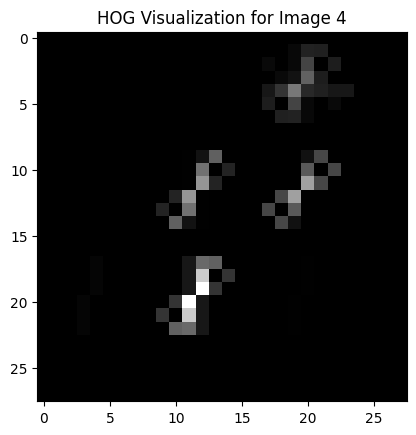

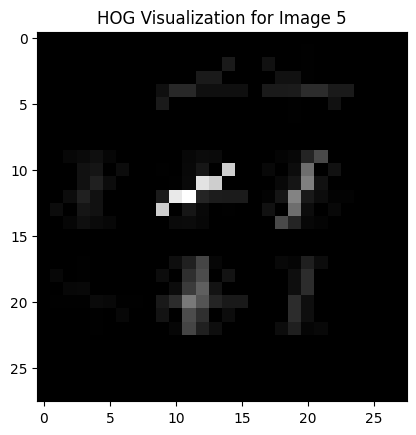

In [ ]:
from skimage.feature import hog
import matplotlib.pyplot as plt

for i in range(5):
    image = x_train[i].reshape(28, 28)

    hog_features, hog_image = hog(image, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True)

    plt.imshow(hog_image, cmap='gray')
    plt.title(f'HOG Visualization for Image {i+1}')
    plt.show()


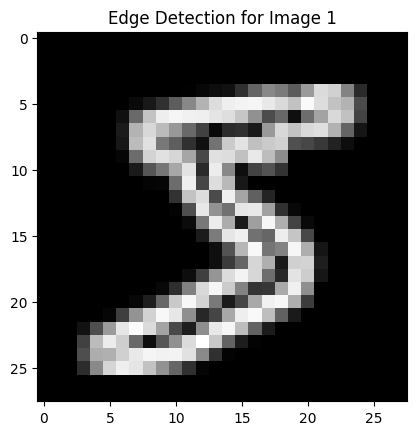

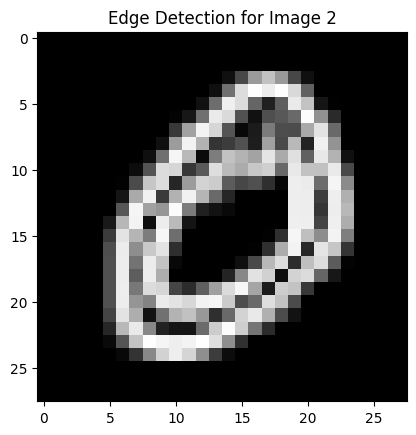

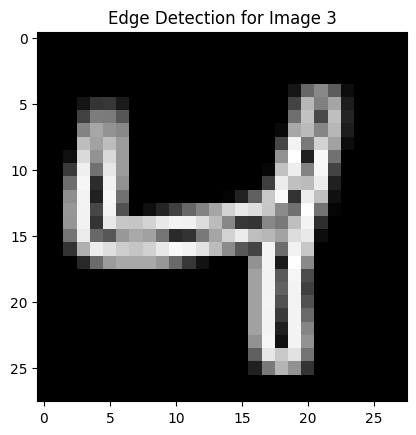

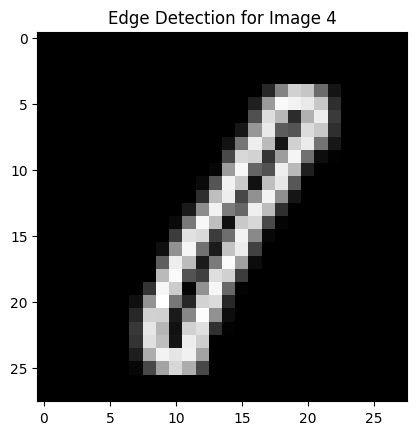

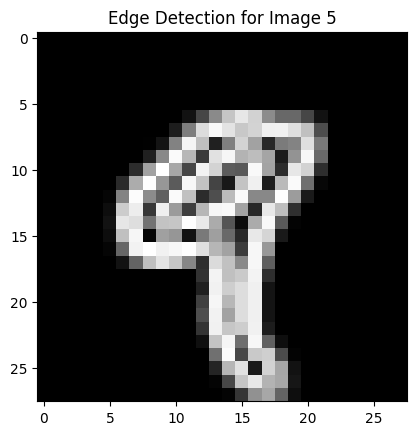

In [ ]:
from skimage import filters
import matplotlib.pyplot as plt

for i in range(5):

    image = x_train[i].reshape(28, 28)

    edges = filters.sobel(image)

    plt.imshow(edges, cmap='gray')
    plt.title(f'Edge Detection for Image {i+1}')
    plt.show()


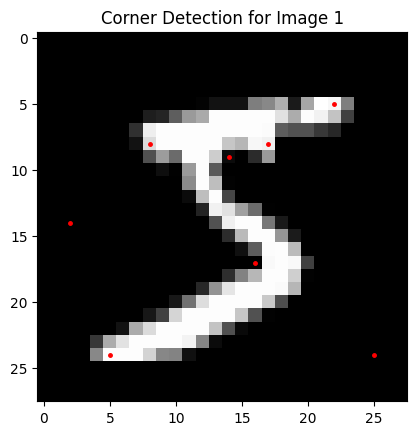

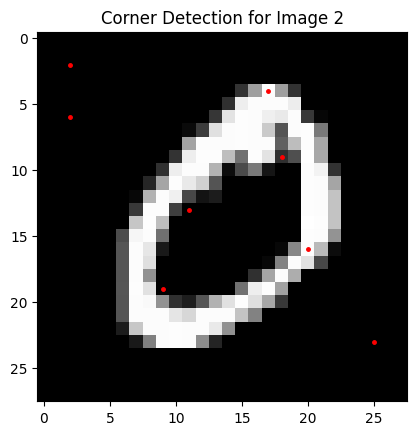

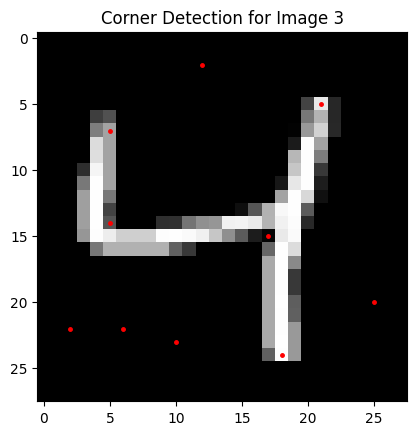

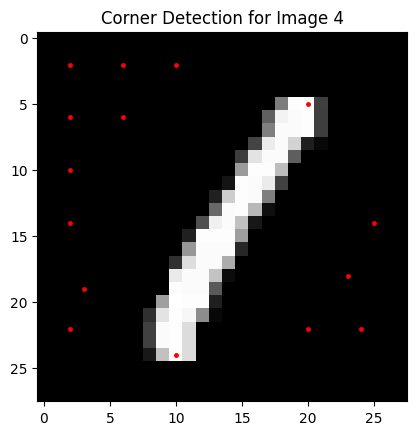

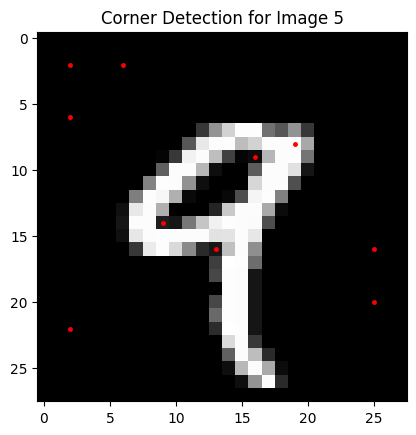

In [ ]:
from skimage.feature import corner_harris, corner_peaks
import matplotlib.pyplot as plt

for i in range(5):
    image = x_train[i].reshape(28, 28)

    corners = corner_peaks(corner_harris(image), min_distance=2)
    plt.imshow(image, cmap='gray')
    plt.plot(corners[:, 1], corners[:, 0], 'r.', markersize=5)
    plt.title(f'Corner Detection for Image {i+1}')
    plt.show()


/usr/local/lib/python3.10/dist-packages/skimage/feature/texture.py:360: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is recommended to use this function with images of integer dtype.
  warnings.warn(


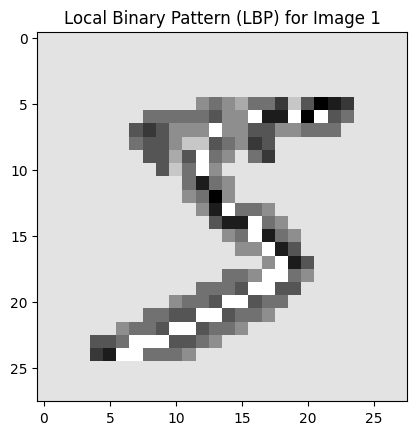

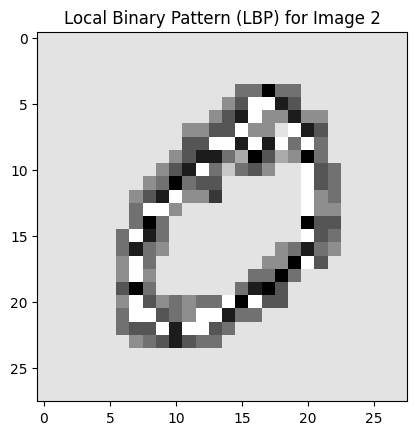

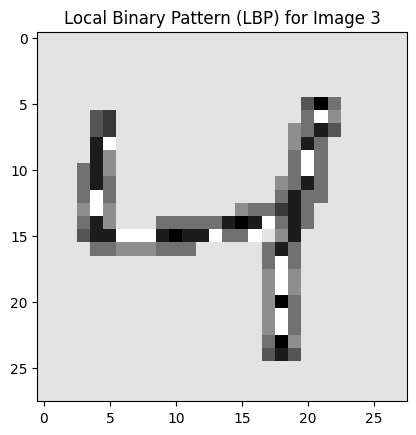

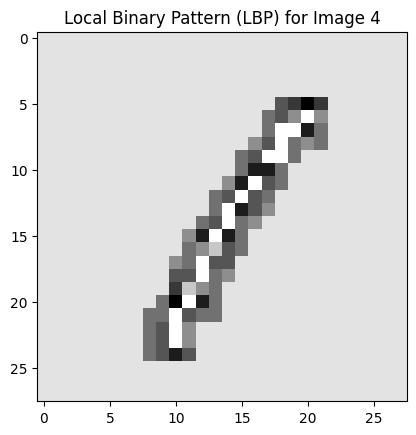

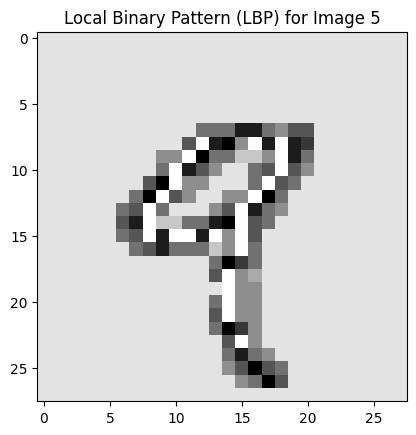

In [ ]:
from skimage.feature import local_binary_pattern
import matplotlib.pyplot as plt
radius = 1
n_points = 8 * radius

for i in range(5):
    image = x_train[i].reshape(28, 28)

    lbp = local_binary_pattern(image, n_points, radius, method='uniform')

    plt.imshow(lbp, cmap='gray')
    plt.title(f'Local Binary Pattern (LBP) for Image {i+1}')
    plt.show()


In [ ]:
!pip install mahotas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 34.0 MB/s eta 0:00:00


In [ ]:
import mahotas
for i in range(10):

    image = x_train[i].reshape(28, 28)

        zernike_moments = mahotas.features.zernike_moments(image, radius=15)

    print(f"Zernike Moments for Image {i+1}: {zernike_moments}")



Zernike Moments for Image 1: [3.18309886e-01 8.51522553e-17 4.56938965e-01 1.40529527e-01
 5.86530758e-02 4.13595479e-02 8.04913680e-02 3.17752751e-01
 9.67942523e-02 1.17104054e-01 7.58871264e-02 2.43504078e-02
 1.45281985e-01 4.38986781e-01 1.89528523e-01 6.90800078e-02
 1.46454949e-01 7.61853599e-02 6.42384552e-02 2.31882829e-02
 1.52933423e-01 3.75798609e-01 1.30824672e-01 1.66265683e-01
 5.06147398e-02]
Zernike Moments for Image 2: [3.18309886e-01 8.40221609e-17 4.84396948e-01 1.04794165e-01
 5.04643692e-02 2.43476398e-02 5.62618385e-02 2.37757481e-01
 3.74647463e-02 1.46113148e-01 5.91188777e-02 1.47284223e-02
 5.62589609e-01 8.42517686e-02 1.15007868e-01 1.37354792e-02
 1.69304171e-01 6.08147770e-02 4.91328428e-02 7.87666679e-03
 4.91409861e-01 2.77363502e-01 1.17893749e-01 5.41231965e-02
 3.78301717e-03]
Zernike Moments for Image 3: [3.18309886e-01 5.70778553e-17 4.42753391e-01 9.34861340e-02
 9.81248410e-02 1.37645916e-01 2.33375481e-02 2.49844857e-01
 3.38588037e-02 2.6166104

In [ ]:
from skimage.feature import hog
from skimage import exposure

def extract_hog_features(images):
    hog_features = []
    for img in images:
        features, _ = hog(img.reshape(28, 28), pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True, )
        hog_features.append(features)
    return np.array(hog_features)

x_train_hog = extract_hog_features(x_train_10)
x_test_hog = extract_hog_features(x_test_10)


In [ ]:
from skimage.filters import sobel

def extract_edge_features(images):
    edge_features = []
    for img in images:
        edges = sobel(img.reshape(28, 28))
        edge_features.append(edges.flatten())
    return np.array(edge_features)

x_train_edges = extract_edge_features(x_train_10)
x_test_edges = extract_edge_features(x_test_10)


In [ ]:
svm_grid = GridSearchCV(SVC(), svm_params, cv=3, n_jobs=-1)
svm_grid.fit(x_train_hog, y_train_10)
print("Best SVM Params:", svm_grid.best_params_)

from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
svm_grid = GridSearchCV(SVC(), svm_params, cv=cv, n_jobs=-1)
svm_grid.fit(x_train_hog, y_train_10)
print("Best SVM Params:", svm_grid.best_params_)

import numpy as np

unique, counts = np.unique(y_train_10, return_counts=True)
class_distribution = dict(zip(unique, counts))
print("Class Distribution:", class_distribution)

svm_grid = GridSearchCV(SVC(), svm_params, cv=3, n_jobs=1)
svm_grid.fit(x_train_hog, y_train_10)



/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


Best SVM Params: {'C': 0.1, 'gamma': 0.001, 'kernel': 'linear'}


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


Best SVM Params: {'C': 0.1, 'gamma': 0.001, 'kernel': 'linear'}
Class Distribution: {0: 1, 1: 3, 2: 1, 3: 1, 4: 2, 5: 1, 9: 1}


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


GridSearchCV(cv=3, estimator=SVC(), n_jobs=1,
             param_grid={'C': [0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1, 1],
                         'kernel': ['linear', 'rbf', 'poly']})

In [ ]:
from sklearn.model_selection import GridSearchCV

svm_params = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1]
}
svm_grid = GridSearchCV(SVC(), svm_params, cv=5, n_jobs=-1)
svm_grid.fit(x_train_scaled, y_train_aug)

print("Best SVM Params:", svm_grid.best_params_)
y_pred_svm = svm_grid.best_estimator_.predict(x_test_scaled)
print("SVM Accuracy:", accuracy_score(y_test_10, y_pred_svm))
print("SVM Classification Report:\n", classification_report(y_test_10, y_pred_svm))


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Best SVM Params: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
SVM Accuracy: 0.8
SVM Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         1
           3       0.00      0.00      0.00         0
           4       0.67      1.00      0.80         2
           5       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
           9       1.00      1.00      1.00         2

    accuracy                           0.80        10
   macro avg       0.58      0.62      0.60        10
weighted avg       0.73      0.80      0.76        10



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [ ]:
!pip install imbalanced-learn


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train_cat, validation_data=(x_test, y_test_cat), epochs=10, batch_size=200)

score = model.evaluate(x_test, y_test_cat, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 53s 170ms/step - accuracy: 0.8370 - loss: 0.5870 - val_accuracy: 0.9793 - val_loss: 0.0668
Epoch 2/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 81s 167ms/step - accuracy: 0.9794 - loss: 0.0681 - val_accuracy: 0.9825 - val_loss: 0.0515
Epoch 3/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 47s 156ms/step - accuracy: 0.9859 - loss: 0.0469 - val_accuracy: 0.9864 - val_loss: 0.0432
Epoch 4/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 80s 151ms/step - accuracy: 0.9904 - loss: 0.0336 - val_accuracy: 0.9877 - val_loss: 0.0371
Epoch 5/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 82s 152ms/step - accuracy: 0.9926 - loss: 0.0261 - val_accuracy: 0.9887 - val_loss: 0.0358
Epoch 6/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 46s 155ms/step - accuracy: 0.9942 - loss: 0.0210 - val_accuracy: 0.9884 - val_loss: 0.0359
Epoch 7/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 85s 165ms/step - accuracy: 0.9957 - loss: 0.0166 - val_accuracy: 0.9884 - val_loss: 0.0394
Epoch 8/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 83s 168ms/step - accuracy: 0.9966 - loss: 0

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step


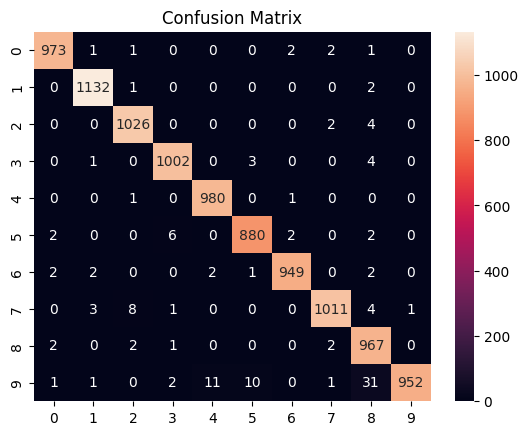

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = model.predict(x_test)
y_pred_classes = y_pred.argmax(axis=1)

conf_mat = confusion_matrix(y_test, y_pred_classes)
sns.heatmap(conf_mat, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()
